In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df=pd.read_csv("/content/wines_SPA.csv")
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


None

In [165]:
for col in ["winery","wine","rating","year","num_reviews","type","country","region","body", "acidity"]:
    print(f"🔍 Unique values in {col}:")
    print(df[col].unique(), "\n")

🔍 Unique values in winery:
['Teso La Monja' 'Artadi' 'Vega Sicilia' 'Pago de Carraovejas'
 'Toro Albala' 'Bodegas El Nido' 'Valdespino' 'Dominio de Pingus'
 'Alvaro Palacios' 'Ordonez' 'Bodegas Valduero' 'Vina Sastre'
 'Sierra Cantabria' 'Descendientes de J. Palacios' 'La Rioja Alta'
 'Marques de Murrieta' 'Vinedos de Paganos' 'Emilio Moro'
 'Quinta de la Quietud' 'Bodegas Mauro' 'Bodega Contador (Benjamin Romeo)'
 'Remirez de Ganuza' 'Bodegas San Roman' 'Pago de Los Capellanes'
 'Bodega Numanthia' 'Alto Moncayo' 'Mas Doix' 'Finca Moncloa'
 'Bodegas Roda' 'Martinet' 'Recaredo' 'Clos Erasmus' 'Barbadillo'
 'Gonzalez-Byass' 'Bodegas Amaren' 'Alvear' 'Equipo Navazos' 'Morca'
 'Territorio Luthier' 'Rafael Palacios' 'Terra Remota'
 'Dehesa de Los Canonigos' 'Miguel Merino' 'Gutierrez de la Vega' 'Alion'
 'Aalto' 'Carmelo Rodero' 'Dominio del Bendito' "Mas d'en Gil"
 'Casa Castillo' 'Matarromera' 'Nin-Ortiz' 'Vinas del Vero'
 'Marques de Riscal' 'Arzuaga' 'Bodegas Mas Alta' 'Dominio de Calog

In [166]:
count_nv = (df['year'] == 'N.V.').sum()
print(count_nv)

288


In [167]:
df.isnull().sum()

,0
winery,0
wine,0
year,2
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


In [168]:
df = df.dropna(subset=['year'])

In [169]:
df['acidity'].value_counts()

,count
acidity,
3.0,6027
2.0,267
1.0,35


In [171]:
df['year'].fillna(100, inplace=True)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.isnull().sum()

<ipython-input-171-8bd82592141c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(100, inplace=True)


,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


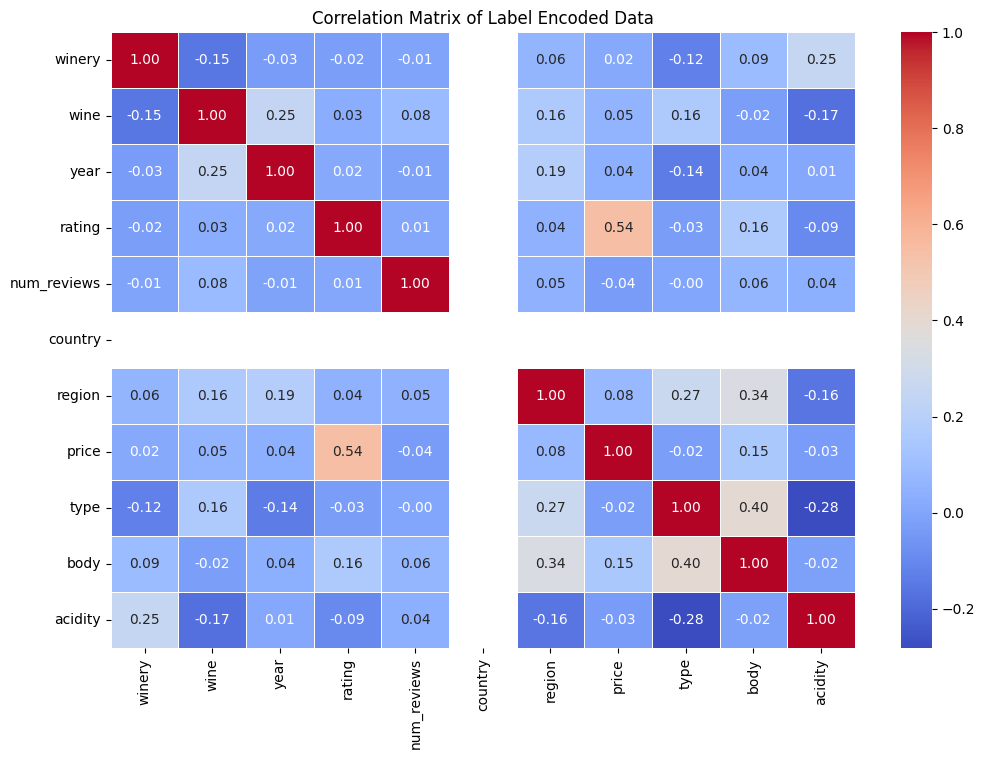

In [178]:
#label encoding the data
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Label Encoded Data")
plt.show()

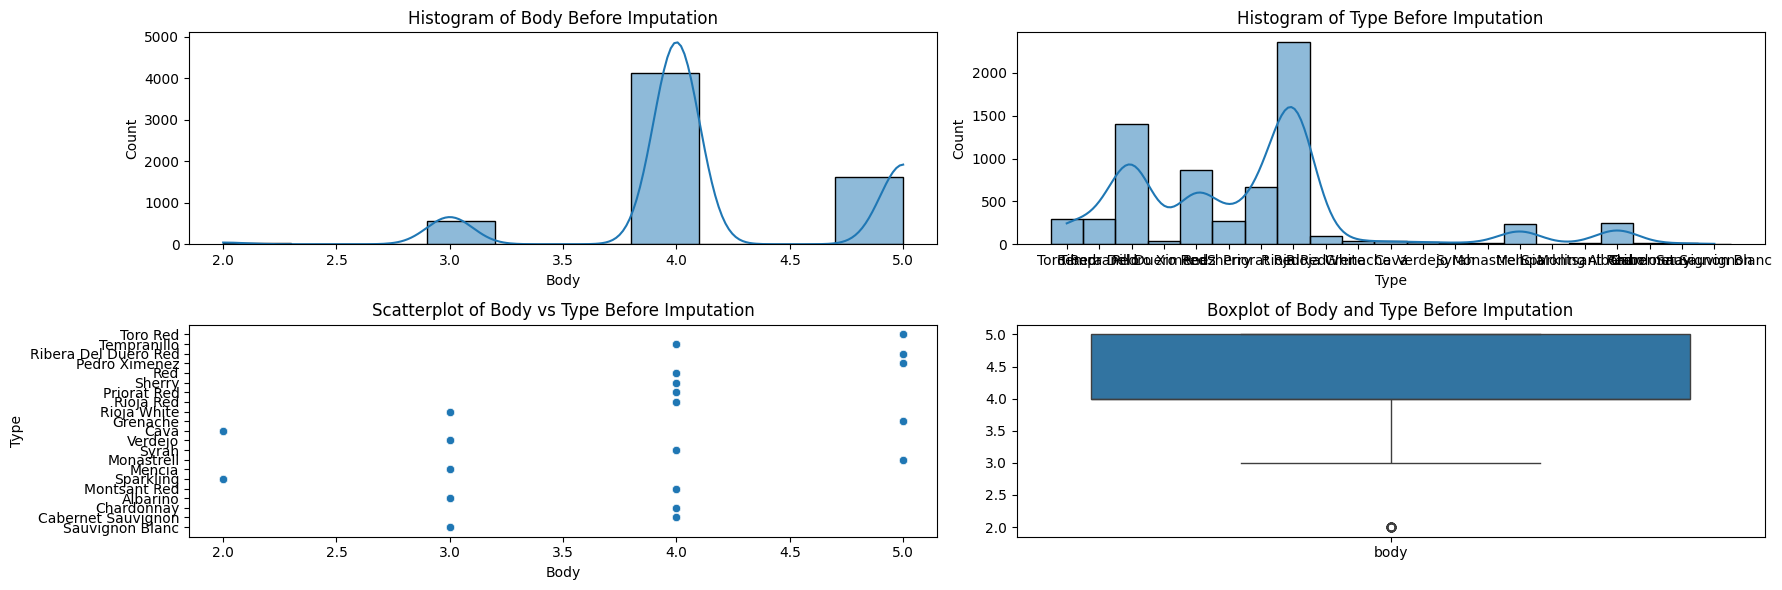

In [179]:
#distribution of body and type before knn imputation
# Set figure size
plt.figure(figsize=(18, 6))

# Histogram for 'body'
plt.subplot(2, 2, 1)
sns.histplot(df['body'], bins=10, kde=True)
plt.title("Histogram of Body Before Imputation")
plt.xlabel("Body")
plt.ylabel("Count")

# Histogram for 'type'
plt.subplot(2, 2, 2)
sns.histplot(df['type'], bins=10, kde=True)
plt.title("Histogram of Type Before Imputation")
plt.xlabel("Type")
plt.ylabel("Count")

# Scatterplot for 'body' vs 'type' (to see missing value patterns)
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['body'], y=df['type'])
plt.title("Scatterplot of Body vs Type Before Imputation")
plt.xlabel("Body")
plt.ylabel("Type")

# Boxplot to check outliers and missing values
plt.subplot(2, 2, 4)
sns.boxplot(data=df[['body', 'type']])
plt.title("Boxplot of Body and Type Before Imputation")

plt.tight_layout()
plt.show()


In [180]:
# performing knn imputer on both body on type as their crr is high
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
df_knn = df.copy()
label_encoder = LabelEncoder()
df_knn['type'] = label_encoder.fit_transform(df_knn['type'].astype(str))
knn_features = ['body', 'type']
imputer = KNNImputer(n_neighbors=5)  # You can change n_neighbors if needed

df_knn[knn_features] = imputer.fit_transform(df_knn[knn_features])

df_knn['type'] = label_encoder.inverse_transform(df_knn['type'].astype(int))

print(df_knn[knn_features].isnull().sum())

body    0
type    0
dtype: int64


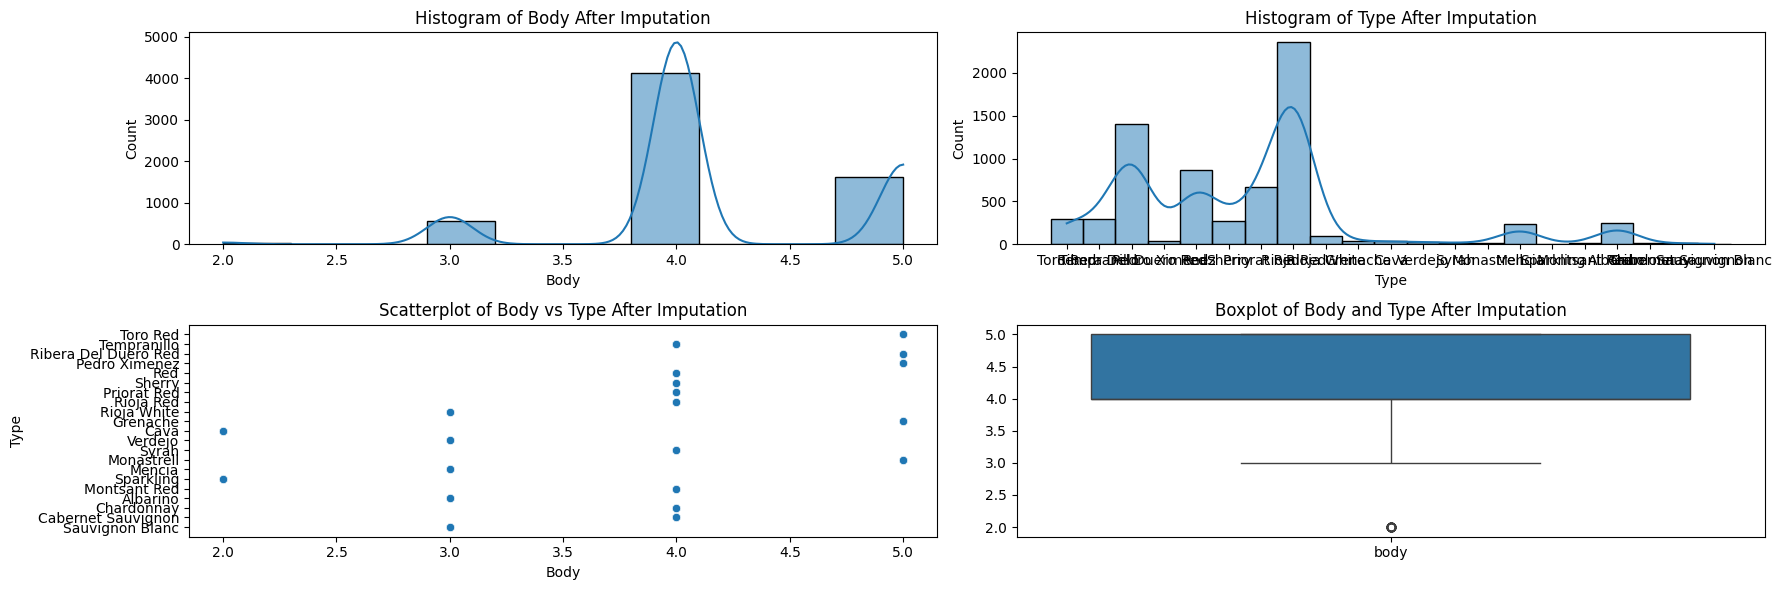

In [181]:
#checking distribution after knn imputation
# Set figure size
plt.figure(figsize=(18, 6))

# Histogram for 'body' after imputation
plt.subplot(2, 2, 1)
sns.histplot(df['body'], bins=10, kde=True)
plt.title("Histogram of Body After Imputation")
plt.xlabel("Body")
plt.ylabel("Count")

# Histogram for 'type' after imputation
plt.subplot(2, 2, 2)
sns.histplot(df['type'], bins=10, kde=True)
plt.title("Histogram of Type After Imputation")
plt.xlabel("Type")
plt.ylabel("Count")

# Scatterplot for 'body' vs 'type' after imputation
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['body'], y=df['type'])
plt.title("Scatterplot of Body vs Type After Imputation")
plt.xlabel("Body")
plt.ylabel("Type")

# Boxplot for 'body' and 'type' after imputation
plt.subplot(2, 2, 4)
sns.boxplot(data=df[['body', 'type']])
plt.title("Boxplot of Body and Type After Imputation")

plt.tight_layout()
plt.show()


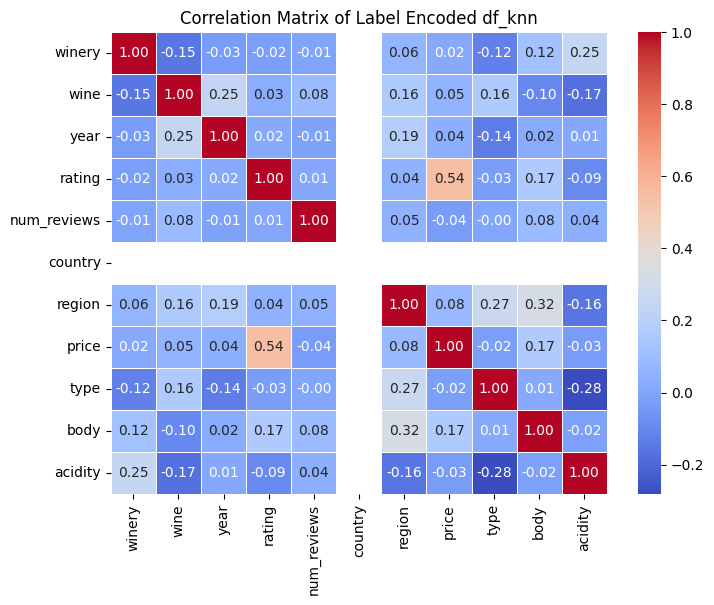

In [182]:
#checking corr after knn imputation
# Label Encoding categorical columns
df_knn_encoded = df_knn.copy()
label_encoder = LabelEncoder()

for col in df_knn_encoded.select_dtypes(include=['object']).columns:
    df_knn_encoded[col] = label_encoder.fit_transform(df_knn_encoded[col].astype(str))

# Compute the correlation matrix
corr_matrix = df_knn_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Label Encoded df_knn")
plt.show()



In [183]:
df_knn_encoded.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


In [184]:
df_knn['acidity'].describe()

,acidity
count,6329.000000
mean,2.946753
std,0.247955
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


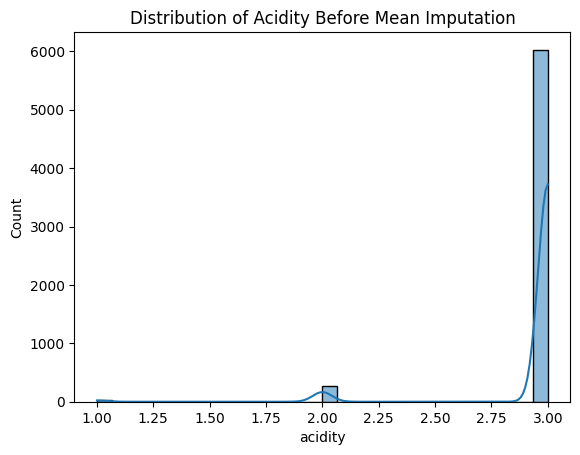

In [185]:
sns.histplot(df_knn['acidity'], kde=True, bins=30)
plt.title("Distribution of Acidity Before Mean Imputation")
plt.show()

In [186]:
#performing mean imputation on acidity column
df_knn['acidity'].fillna(df_knn['acidity'].mean(), inplace=True)

<ipython-input-186-09295960f81d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_knn['acidity'].fillna(df_knn['acidity'].mean(), inplace=True)


In [187]:
df_knn['acidity'].describe()

,acidity
count,7498.000000
mean,2.946753
std,0.227804
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


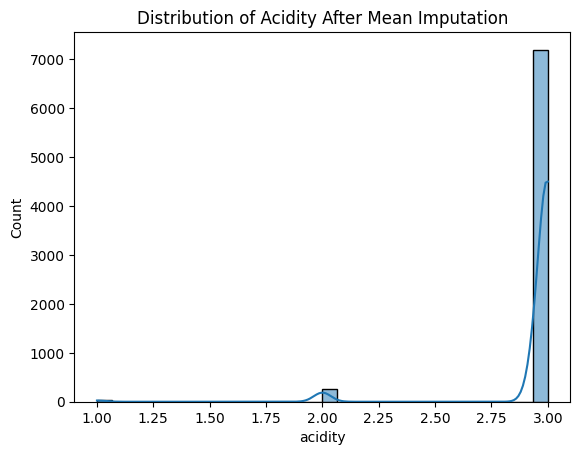

In [188]:
sns.histplot(df_knn['acidity'], kde=True, bins=30)
plt.title("Distribution of Acidity After Mean Imputation")
plt.show()

In [189]:
DF_CLEAN=df_knn
df_knn.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


In [190]:
DF_CLEAN.to_csv("DF_CLEAN.csv", index=False)